## NOAA Virginia Lakes Ridge Historical Climate Data Analysis

This project will analyze data from the NOAA Virginia Lakes Ridge weather station. This is one of the many weather stations maintained by the NOAA National Climatic Data Center. I chose this station for reasons of personal interest: I have spent a lot of time at Virginia Lakes. Virginia Lakes is located in the Eastern Sierra near Lee Vining, specifically at Latitude/Longitude 38.0833°, -119.25° and elevation 2804.2 m. Visit http://www.ncdc.noaa.gov/cdo-web/datasets/GHCNDMS/stations/GHCND:USS0019L13S/detail for specifics. Visit https://gis.ncdc.noaa.gov/geoportal/catalog/search/resource/details.page?id=gov.noaa.ncdc:C00841 for a comprehensive list of NOAA climate station data, e.g. to perform this or similar analysis at another station. It's a real data treasure trove.

In [2]:
#First, do basic module imports and set up. 
#These are the primary modules used in this analysis.
import numpy as np
from pandas import Series, DataFrame
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
#Load the data to a Data Frame
df_vl = pd.read_csv('../data/noaa_vglr_1979_2015.csv')

To begin I'll look at historical temperature data, specifically average daily maximum average temperatures. First we need to do some setup and data massaging.

In [5]:
#Convert from 10ths Celcius to Farenheight, put in a new column.
#Also remove some questionable data.
df_vl['mean_max_temp_f'] = .338 * df_vl['MMXT']

def fix_temp(temp):
    if temp < -50:
        return np.NaN
    return temp

df_vl['mean_max_temp_f'] = df_vl['mean_max_temp_f'].apply(fix_temp)

Lets look at this data a little, some summary statistics and visualize the distribution.

count    371.000000
mean      33.522129
std       26.411228
min      -19.942000
25%       10.647000
50%       29.068000
75%       58.812000
max       84.162000
Name: mean_max_temp_f, dtype: float64

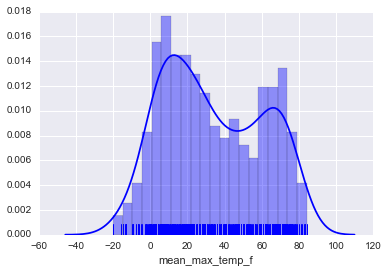

In [7]:
sns.distplot(df_vl['mean_max_temp_f'].dropna(), color="b", rug=True, bins=20, kde=True)
df_vl['mean_max_temp_f'].describe()

Looking at the summary statistics, this looks pretty reasonable, especially if one knows a bit about the Virginia Lakes climate, specifically that it's COLD in the winter. So, it seems our conversion was correct.

The distribution plot is intersting. I wouldn't have anticipated the double humps. It seems the temperature distribution is dominated by the cold winters and the comparitively mild summers, without much in between. This makes sense of you've been there: winters are really cold, and summers are quite nice, and the transition from one to the other is dramatic.

Now lets also the dates easier to work with by splitting out the year and month into new columns. This will help in creating historical trend visualizations.

In [9]:
def get_year_from_date(d):
    return int(d/10000)

def get_month_from_date(d):
    m_map = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 
             5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 
             9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}
    return m_map[int((d%10000)/100)]

df_vl['year'] = df_vl['DATE'].apply(get_year_from_date)
df_vl['month'] = df_vl['DATE'].apply(get_month_from_date)

We have data from Jan 1979 to June 2015 in this data frame. This is the period for which this station has operated (note other stations have a much longer history.)

In [47]:
df_vl[df_vl['DATE'].isin([df_vl['DATE'].min(), df_vl['DATE'].max()])][['year','month']]

,year,month
0,1979,Jan
414,2015,Jun


Now lets look for some trends. First lets focus on two months, Augus and January, to get some idea of how temperatures have evolved in winter and summer months.

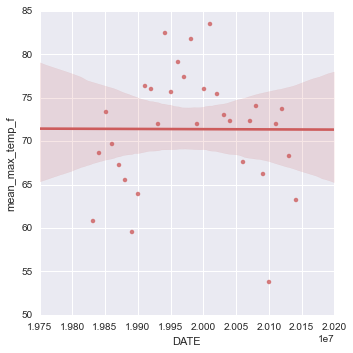

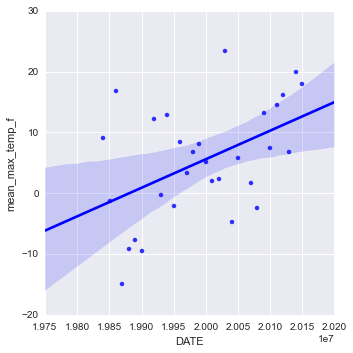

In [48]:
df_vl_jan = df_vl[df_vl['month'] == 'Jan']
df_vl_aug = df_vl[df_vl['month'] == 'Aug']
sns.lmplot(x="DATE", y="mean_max_temp_f", data=df_vl_aug,
           scatter_kws={"marker": "o", "color": "indianred"},
           line_kws={"color": "indianred"})
sns.lmplot(x="DATE", y="mean_max_temp_f", data=df_vl_jan,
           scatter_kws={"marker": "o", "color": "blue"},
           line_kws={"color": "blue"})
None

Interesting: it for Aug. there is absolutely not trend, in terms of a linear model. If I fit a curve instead, we'd see an interesting shape, sort of parabolic. Of course we shouldn't read too much into this, given the short time span. I bet if I used a longer time range we'd see something more like a sine wave, with perhaps some general linear trend.

For January in contrast, there is a rather distinct trend visible. Looking at the scatter it appears this trend is real, if admittedly a bit weak: there's a lot of variability in years. And as with August data we'll take this with a grain of salt and not try to infer any longer term trends. All we know from this is that it's gotten generally warmer of the last 40 years in January at this location. This is interesting, but only within it's narrow context, not in terms of broader implications (say, climate science.)

While we're at it, lets try a plot containing all months for the period.

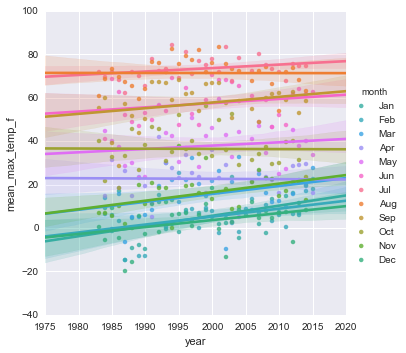

In [49]:
sns.lmplot(x="year", y="mean_max_temp_f", data=df_vl, hue='month', 
           palette=sns.husl_palette(12, h=.5))
None

Again, interesting, but not definitive. What's most interesting is, it looks like my choice of August above was not terribly representative of Summer months in general. All months show either a positive trend or no trend, for all seasons. August happens to be one of those months with no trend. So, it looks like it's generally gotten warmer in Virginia Lakes over the last 40 years. With another 40 years I might actually be willing to make some broader conclusions. So, check back in 40 years. :)